In [1]:
import os
import sys

pkg_path = os.path.abspath('..')
sys.path.insert(0, pkg_path)


import pandas
data = pandas.read_csv('../data/standardised_rrpu2.csv')
data

,Unnamed: 0,strain,plasmid,backbone,iptg,log_mean_gfp,log_mean_v_x,log_std_gfp,log_std_v,log_rho,fit_goodness,std_gfp_correct,rrpu,median_yfp,newstandard
0,0,KT2440,1201,pSeva221,1,0.250036,2.314908,0.474749,0.963332,0.299708,0.975201,0.452925,0.269272,NaN,0.014204
1,1,KT2440,1201,pSeva221,5,0.037474,1.950081,0.456776,0.945077,0.328764,0.989436,0.431385,0.116138,NaN,-0.007895
2,2,KT2440,1201,pSeva221,10,0.093799,2.196333,0.463687,0.949740,0.289366,0.982129,0.443850,0.128950,NaN,-0.006173
3,3,KT2440,1201,pSeva221,20,0.173098,2.280760,0.494051,0.984647,0.353470,0.981735,0.462158,0.202252,NaN,0.004115
4,4,KT2440,1201,pSeva221,30,0.044898,2.189524,0.461442,0.961913,0.282821,0.979128,0.442603,0.079579,NaN,-0.012689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,1881,KT2440,Srpr_s4,pSeva251,100,1.831379,1.784507,0.722501,0.812192,0.489919,0.986858,0.629853,1.885751,0.21,0.217455
1882,1882,KT2440,Srpr_s4,pSeva251,200,1.722367,1.804346,0.782778,0.840321,0.469963,0.984655,0.690947,1.768299,0.18,0.189458
1883,1883,KT2440,Srpr_s4,pSeva251,500,1.579250,1.898264,0.822829,0.852300,0.480380,0.981007,0.721671,1.584353,0.15,0.151712
1884,1884,KT2440,Srpr_s4,pSeva251,1000,1.315686,1.882350,0.780218,0.817074,0.535988,0.986397,0.658680,1.329462,0.11,0.109659


In [2]:
from pyolin.gate import Gate

data[(data.plasmid == '1818') & (data.strain == 'CC118Lpir')]

,Unnamed: 0,strain,plasmid,backbone,iptg,log_mean_gfp,log_mean_v_x,log_std_gfp,log_std_v,log_rho,fit_goodness,std_gfp_correct,rrpu,median_yfp,newstandard
854,854,CC118Lpir,1818,pSeva221,1,-0.410375,2.102973,0.369613,1.092210,0.268341,0.976547,0.356057,-0.414849,NaN,-0.218060
855,855,CC118Lpir,1818,pSeva221,5,-0.420718,2.036616,0.368315,0.978424,0.200829,0.987441,0.360811,-0.419427,NaN,-0.252111
856,856,CC118Lpir,1818,pSeva221,10,-0.401183,2.129807,0.373684,0.997560,0.221752,0.989060,0.364381,-0.407505,NaN,-0.163103
857,857,CC118Lpir,1818,pSeva221,20,-0.396296,2.017766,0.368344,0.932713,0.276111,0.989139,0.354025,-0.392378,NaN,-0.048619
858,858,CC118Lpir,1818,pSeva221,30,-0.369666,2.067658,0.376352,0.946730,0.312447,0.987094,0.357510,-0.371400,NaN,0.113035
859,859,CC118Lpir,1818,pSeva221,40,-0.346787,1.994940,0.377777,0.915037,0.364887,0.987433,0.351730,-0.337935,NaN,0.378029
860,860,CC118Lpir,1818,pSeva221,70,-0.207246,1.953192,0.405367,0.826898,0.497056,0.986531,0.351744,-0.182755,NaN,1.729704
861,861,CC118Lpir,1818,pSeva221,100,-0.179096,2.030152,0.418405,0.843568,0.493301,0.985619,0.363953,-0.173334,NaN,1.818714
862,862,CC118Lpir,1818,pSeva221,200,-0.030835,2.121542,0.451114,0.817306,0.537869,0.984420,0.380302,-0.050975,NaN,3.054274
863,863,CC118Lpir,1818,pSeva221,500,0.166934,2.032734,0.473542,0.753182,0.591283,0.985260,0.381895,0.174729,NaN,5.770696


In [3]:
from pyolin.analysis import GateData

gdata = GateData(data)

amer_gates = gdata[::'Amer_f1']

gdata[::'1818'][4].dataframe

,Unnamed: 0,strain,plasmid,backbone,iptg,log_mean_gfp,log_mean_v_x,log_std_gfp,log_std_v,log_rho,fit_goodness,std_gfp_correct,rrpu,median_yfp,newstandard
24,24,KT2440,1818,pSeva221,1,0.167917,2.430812,0.494386,0.963714,0.319474,0.972099,0.468478,0.170266,NaN,-0.000467
25,25,KT2440,1818,pSeva221,5,0.106066,2.268994,0.475108,0.960957,0.326618,0.975013,0.449052,0.134511,NaN,-0.005419
26,26,KT2440,1818,pSeva221,10,0.082115,2.264120,0.458722,0.945643,0.324057,0.976447,0.433969,0.110572,NaN,-0.008636
27,27,KT2440,1818,pSeva221,20,0.132097,2.288684,0.492964,0.950514,0.348131,0.973954,0.462127,0.160346,NaN,-0.001859
28,28,KT2440,1818,pSeva221,30,0.072354,2.203032,0.459258,0.928158,0.340722,0.978036,0.431777,0.113172,NaN,-0.008290
29,29,KT2440,1818,pSeva221,40,0.061178,2.186668,0.457807,0.935758,0.338324,0.979372,0.430810,0.103961,NaN,-0.009511
30,30,KT2440,1818,pSeva221,70,0.108193,2.191277,0.474904,0.933449,0.361316,0.978694,0.442821,0.154859,NaN,-0.002622
31,31,KT2440,1818,pSeva221,100,0.206208,2.268931,0.507128,0.934889,0.390181,0.979338,0.466932,0.243504,NaN,0.010245
32,32,KT2440,1818,pSeva221,200,0.529189,2.335137,0.630504,0.942214,0.356693,0.980832,0.589030,0.555446,NaN,0.065773
33,33,KT2440,1818,pSeva221,500,1.216588,2.275507,0.749823,0.948119,0.340818,0.976755,0.704930,1.262312,NaN,0.278710


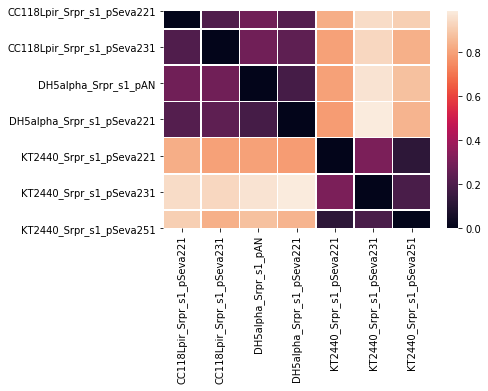

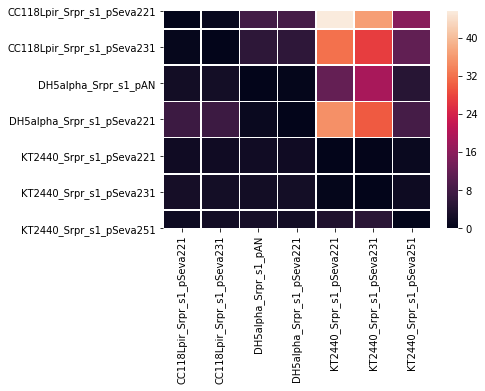

In [6]:
from pyolin.analysis import similarity_table
from pyolin.analysis import similarity_heatmap
from pyolin.analysis import curve_length
from pyolin.analysis import frechet
from pyolin.analysis import area
from pyolin.analysis import pcm

import seaborn as sns
import matplotlib.pylab as plt

similarity_heatmap(gdata, 'Srpr_s1', func=frechet)
plt.show()
similarity_heatmap(gdata, 'Srpr_s1', func=pcm)
plt.show();